# Final project




# Google play store

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
apps=pd.read_csv(r'C:\Users\Ademi\OneDrive\Рабочий стол\googleplaystore.csv')
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## 1. Introduction

For the Final project for this class I decided to choose Google play store dataset. The main goal of this project is making data analysis for apps from Google Play Store to identify trends and make conclusions about relevance of this app. I chose this specific dataset because it contains a sufficient amount of interesting data of virety types for the analysis.
Chosen dataset is based on real data taken from the Google Play Store. Google Play Store is digital market where Android user can find and download free or paid certified apps. 
Dataset contains information about apps, including their original name, category,size,rating, etc. Should be noticed that dataset was created in 2018 year, that is why most recent update of app was made during that year. 



## 2. Data description

In [485]:
#identify number of rows and columns
apps.shape

(10841, 13)

There are about 10346 rows(apps) and 13 columns 

#### Description of columns

1. App - name of application
2. Category - category of app (such as Business, Family, Game and etc.)
3. Rating - overall rating of app made by users 
4. Reviews - number of reviews 
5. Size - size of app in megabytes or kylobytes. Can have numerical value or 'Varies with device' value
6. Installs - number of installs in format like 10000+ downloads
7. Type - free or paid app
8. Price - price of paid app
9. Content Rating - age class the app is targeted at (Teen,Everyone...)
10. Genres - genres the app belongs to. App have to be in one category, but can have one or more genres. 
11. Last Updated - the date when last update of app was made. Can have numerical value or 'Varies with device' value
12. Current Ver - last version of app
13. Android Ver - minimum required version of android device

## 3. Research question

1. Which categories are the most popular? Show the most installed apps in each of the top 4 categories
2. What is the average rating for applications that have not been updated for more than 3 years?
3. How does the type of application (Paid or Free) affect the download frequency?
4. Are there any dependence of app size on Android version of mobile? Describe the relationship between them.
5. Compare by rating the most popular and the least popular apps in 'Everyone', 'Teen', 'Adults only 18+' content ratings

## 4. Data preparation

In [487]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Most of columns have full data, but we see that there are some columns that have missing values: Rating, Current Ver, Android Ver, Content Rating, Type

In [488]:
apps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Rating column has the most number of vissing values.

In [489]:
print(apps["Rating"].isnull().sum()/len(apps))

0.13596531685268887


Only 14% percent of data are missing. We can fill missing values

In [490]:
mean=apps['Rating'].mean()
median=apps['Rating'].median()
mode=apps['Rating'].mode()

print(mean,median,mode)


4.193338315362448 4.3 0    4.4
dtype: float64


In [491]:
apps['Rating'].fillna(median,inplace=True)

Use median rating ro fill missing values

In [492]:
print(apps["Current Ver"].isnull().sum()/len(apps))
print(apps["Android Ver"].isnull().sum()/len(apps))
print(apps["Content Rating"].isnull().sum()/len(apps))
print(apps["Type"].isnull().sum()/len(apps))

0.0007379393044922055
0.0002767272391845771
9.224241306152569e-05
9.224241306152569e-05


In [493]:
apps.dropna(how='any',inplace=True)

In Type, Current Ver, Android Ver and Content Rating % of missing values is not substantial. We can just drop missing values in that columns

In [494]:
apps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [495]:
apps.duplicated().value_counts()/apps.shape[0]

False    0.955398
True     0.044602
dtype: float64

In [496]:
apps.drop_duplicates(inplace=True) 

Removing duplicated values by whoe columns

In [497]:
apps.App.nunique()

9648

Number of rows is 10346, but we see that there are only 9648 unique apps in dataset.

In [498]:
a=apps['App']
apps[a.isin(a[a.duplicated()])].sort_values('App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
3083,365Scores - Live Scores,SPORTS,4.6,666521,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2590,textPlus: Free Text & Calls,SOCIAL,4.1,382120,28M,"10,000,000+",Free,0,Everyone,Social,"July 26, 2018",7.3.1,4.1 and up
2964,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133825,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3055,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3652,wetter.com - Weather and Radar,WEATHER,4.2,189313,38M,"10,000,000+",Free,0,Everyone,Weather,"August 6, 2018",Varies with device,Varies with device


Duplicated apps differentiate only by number of reviews.
We have to drop duplicated apps and keep information only by first attempt of app

In [499]:
apps=apps.drop_duplicates(subset=['App'], keep='first')

In [500]:
apps.shape

(9648, 13)

In [501]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   object 
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   object 
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   object 
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


We have to convert each column to the appropriate data type.  For example:to work with numeric values, we have to convert datatype of column to int or float

In [502]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [503]:
apps['Reviews'] = apps['Reviews'].astype(int)

Converting 'Reviews' to int

In [504]:
apps['Installs'] =apps['Installs'].str.replace(',','').str.replace('+','').astype('int')

Converting 'Installs' to int. Removing ',' and '+' 

In [505]:
apps['Price']=apps['Price'].str.replace('$','').astype(float)

Converting 'Price' to float. Removing '$'

In [506]:
apps['Last Updated']=pd.to_datetime(apps['Last Updated'])

Converting 'Last Updated' to datetime

In [507]:
apps['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

'Size' column has different types of measurement, such as megabytes and kilobytes. We have to convert this types to common scale of measurement i.e. bytes and replace 'Varies with device' to 0

In [508]:
#e - returns a float multiplied by the specified power of 10
apps['Size'] = apps['Size'].str.replace('M','e+6').str.replace('k','e+3').str.replace('Varies with device',"0").astype('float')

We finished data cleaning and preparation

## 5. Data analysis and visualisation

### 5.1 Q1: Which categories are the most popular? Show the most installed apps in each of the top 4 categories 
First we have to prepare data that will be used in plots. Then create visualization of given task

In [509]:
# data preparation for Q1
category_freq=apps['Category'].value_counts()

In [510]:
apps['Category'].value_counts().head(4)

FAMILY      1828
GAME         959
TOOLS        825
BUSINESS     420
Name: Category, dtype: int64

4 most popular categories

In [511]:
f_apps=apps[apps['Category'] == 'FAMILY'].sort_values(['Installs'],ascending=False).head(15)
g_apps=apps[apps['Category'] == 'GAME'].sort_values(['Installs'],ascending=False).head(15)
t_apps=apps[apps['Category'] == 'TOOLS'].sort_values(['Installs'],ascending=False).head(15)
b_apps=apps[apps['Category'] == 'BUSINESS'].sort_values(['Installs'],ascending=False).head(15)

15 the most installed apps in each of 4 category

In [512]:
# visualisation code for Q1

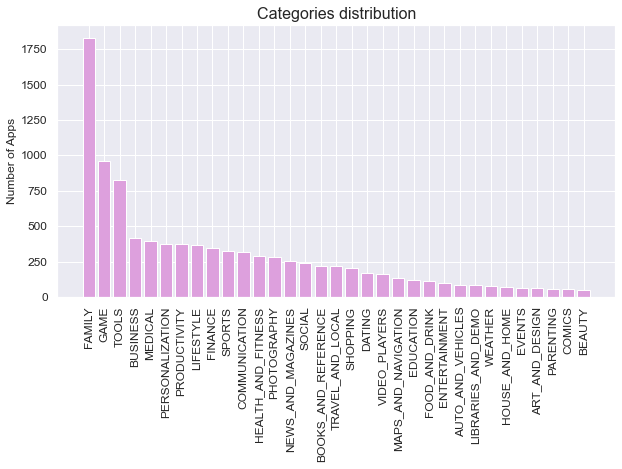

In [513]:
plt.subplots(figsize=(10,5))

plt.bar(category_freq.index,category_freq,color='plum') #bar chart for visualization
plt.title('Categories distribution',size=16)
plt.ylabel("Number of Apps",size=12)
plt.xticks(size = 12,rotation=90) #rotation to make xticks vertical
plt.yticks(size = 12)
plt.show()

In [514]:
f_apps.Installs

6269     100000000
4229     100000000
4111     100000000
6849     100000000
4329     100000000
4217     100000000
4797     100000000
3975     100000000
4247     100000000
2104      50000000
4580      50000000
4060      50000000
4326      50000000
10513     50000000
7404      50000000
Name: Installs, dtype: int32

C:\Users\Ademi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ademi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0, flags=flags)


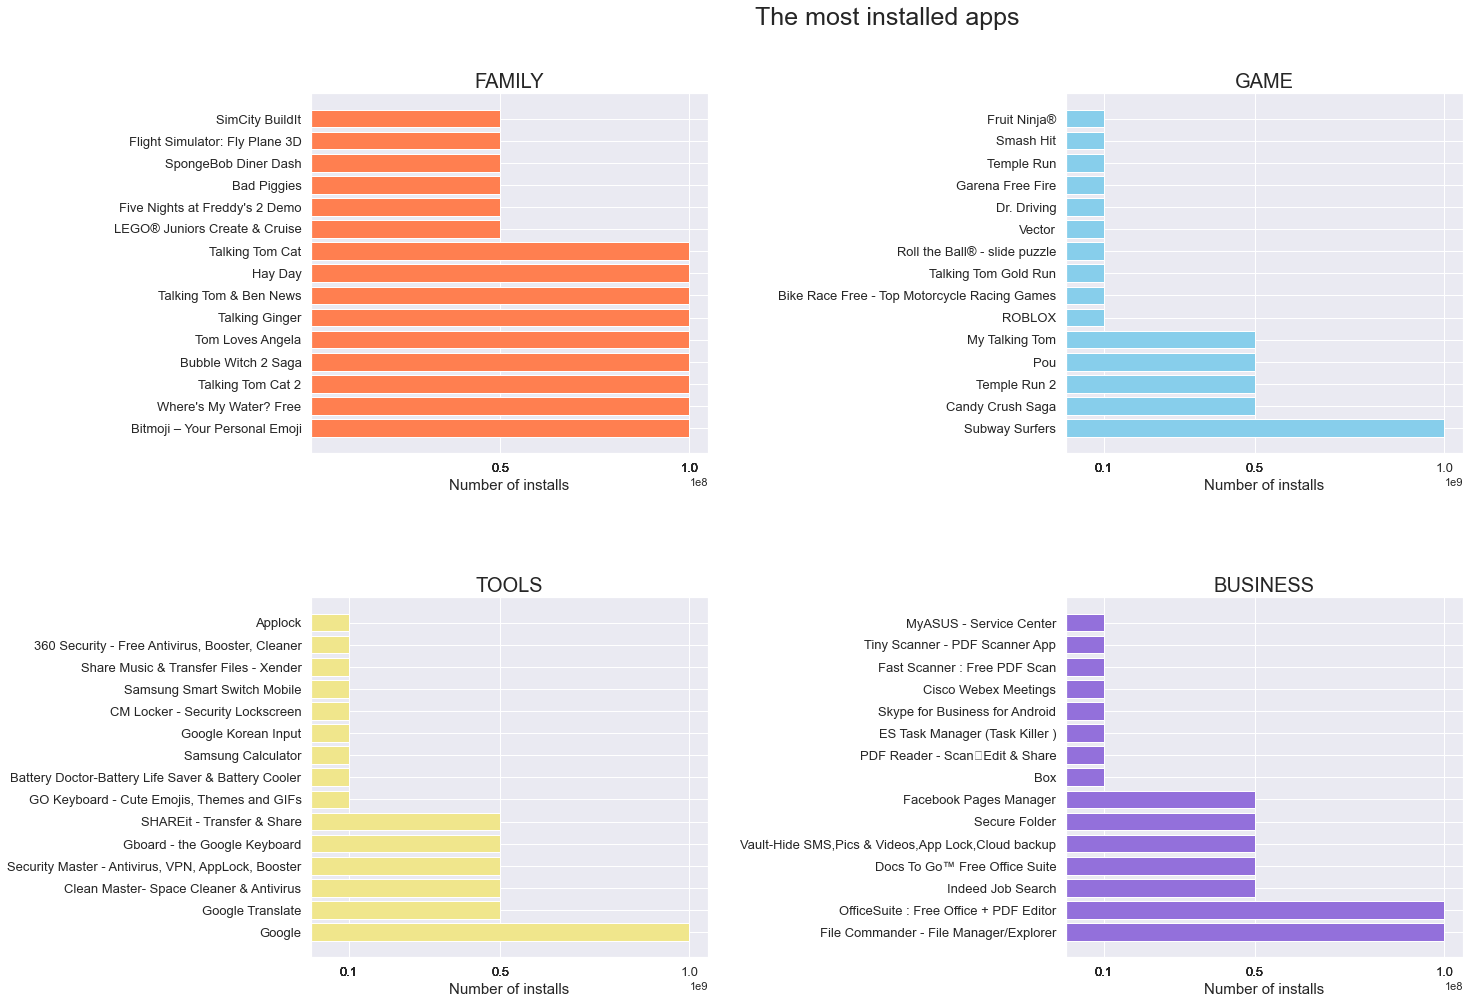

In [515]:

fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (20,15)) #number of rows and columns

# FAMILY
axs[0,0].barh(f_apps['App'],f_apps['Installs'],color='coral') #barh is horizontal bar charts
axs[0,0].set(xticks=f_apps['Installs']) #set Installs as ticks for x axis and title of x axis
axs[0,0].yaxis.set_tick_params(labelsize=13) #size of ticks for y axis
axs[0,0].xaxis.set_tick_params(labelsize=13) #size of ticks for x axis
axs[0,0].set_title('FAMILY', fontsize=20)
axs[0,0].set_xlabel('Number of installs',size=15)


# GAME
axs[0,1].barh(g_apps['App'],g_apps['Installs'],color='skyblue')
axs[0,1].set(xticks=g_apps['Installs'])
axs[0,1].yaxis.set_tick_params(labelsize=13)
axs[0,1].set_title('GAME', fontsize=20)
axs[0,1].xaxis.set_tick_params(labelsize=13)
axs[0,1].set_xlabel('Number of installs',size=15)


# TOOLS
axs[1,0].barh(t_apps['App'],t_apps['Installs'],color='khaki')
axs[1,0].set(xticks=t_apps['Installs'])
axs[1,0].yaxis.set_tick_params(labelsize=13)
axs[1,0].set_title('TOOLS', fontsize=20)
axs[1,0].xaxis.set_tick_params(labelsize=13)
axs[1,0].set_xlabel('Number of installs',size=15)


# BUSINESS
axs[1,1].barh(b_apps['App'],b_apps['Installs'],color='mediumpurple')
axs[1,1].set(xticks=b_apps['Installs'])
axs[1,1].yaxis.set_tick_params(labelsize=13)
axs[1,1].set_title('BUSINESS', fontsize=20)
axs[1,1].xaxis.set_tick_params(labelsize=13)
axs[1,1].set_xlabel('Number of installs',size=15)


plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9,top=0.9,wspace=0.9, hspace=0.4) 
#subplots_adjust refine location and paramentres of multiple plots within a single figure
fig.suptitle("The most installed apps", size=25)
plt.show()

We found the most popular categories: FAMILY, GAME, TOOLS and BUSINESS. Difference between number of apps of each category is big. By 'Categories distribution' plot we see that amount of apps of FAMILY category significantly exceeds the number of applications in other categories. 
<br>
By 'The most installed apps' we define that in each of all categories except FAMILY exists one app with more than 1 million installs, Subway Surfers in GAME, Google in TOOLS, File Commander - File Manager/ Explorer in BUSINESS. In FAMILY category there almost 10 apps with more than 1 million installs. 

### 5.2 Q2: What is the average rating for applications that have not been updated for more than 3 years?
First we have to calculate for how many years app was not been updated. Then use groupby function for grouping apps that have not been updated for more than 3 years be rating mean

In [516]:
apps['Last Updated'].max()

Timestamp('2018-08-08 00:00:00')

Date of the most recent update

In [517]:
from datetime import datetime #importing datetime library

now = datetime.strptime('08-08-2018', "%d-%m-%Y") #we define the current date as date of the most recent update
apps['Year'] = now.year - apps['Last Updated'].dt.year  #add column 'Year'- year of not updating of app
apps.sort_values('Year',ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
7479,FML F*ck my life + widget,FAMILY,4.2,1415,209000.0,100000,Free,0.0,Everyone,Entertainment,2010-05-21,3.1,1.5 and up,8
5561,Satellite AR,BOOKS_AND_REFERENCE,4.1,9636,93000.0,1000000,Free,0.0,Everyone,Books & Reference,2011-09-22,2.4,2.1 and up,7
7430,CJ Poker Odds Calculator,GAME,4.1,207,116000.0,50000,Free,0.0,Everyone,Card,2011-01-30,1.2,1.6 and up,7
8084,Freecell CY,GAME,4.0,387,1100000.0,50000,Free,0.0,Everyone,Card,2011-04-16,1.3.3,1.6 and up,7
7487,CONTRACT KILLER: ZOMBIES,GAME,4.4,144545,13000000.0,5000000,Free,0.0,Teen,Action,2011-12-01,1.1.0,2.1 and up,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4063,Screen Lock - with Fingerprint Simulator,TOOLS,3.7,338449,2800000.0,10000000,Free,0.0,Everyone,Tools,2018-06-19,8.6,2.3.3 and up,0
4062,Broken Screen Prank,FAMILY,3.3,23682,9800000.0,1000000,Free,0.0,Teen,Casual,2018-06-14,6.2,4.0 and up,0
4061,Temple Run,GAME,4.3,4000433,42000000.0,100000000,Free,0.0,Everyone,Arcade,2018-08-02,1.9.1,4.0 and up,0
4058,Z Ringtones PREMIUM 2018,PERSONALIZATION,4.5,10158,3600000.0,500000,Free,0.0,Everyone,Personalization,2018-03-01,1.5,4.0.3 and up,0


Apps were not updated at most for 8 years. 0 means that app was updated current year lust time

In [518]:
old=apps[apps['Year']>3] 
old=old.groupby('Year').Rating.mean() #grouping mean rating of apps by year of not updating 
old

Year
4    4.059606
5    4.103738
6    3.884615
7    3.966667
8    4.200000
Name: Rating, dtype: float64

In [519]:
# visualisation code for Q2

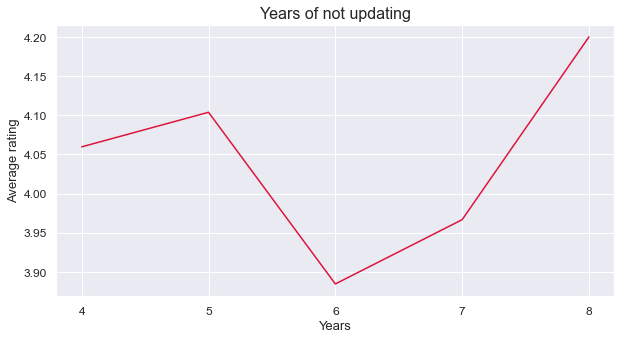

In [520]:
plt.subplots(figsize=(10,5))

plt.plot(old.index,old,color='crimson') #line plot; for x axis - average ratings, foy y - years
plt.title('Years of not updating',size=16)
plt.ylabel("Average rating",size=13)
plt.xlabel("Years",size=13)
plt.xticks(old.index,size = 12) #clarify that ticks - years of not updating
plt.yticks(size = 12) 


plt.show()

By graph we can see that rating of app does not depend from the update version.But we cannot exclude case when app is not in use and rating was dedicated by old user ratings.Also rating could given by small amount of people. That is why rating can not be considarable as first parameter when we want to find out about popularity of app


### 5.3 Q3: How does the type of application (Paid or Free) affect the download frequency? 


In [521]:
plen=apps[apps['Type']=='Paid'].shape[0]
flen=apps[apps['Type']=='Free'].shape[0]
print(plen)
print(flen)

753
8895


We found out that there are 762 paid and 9584 free apps in dataframe

In [522]:
sep=apps.groupby('Type').Installs.value_counts()

Group by type unique number of installs


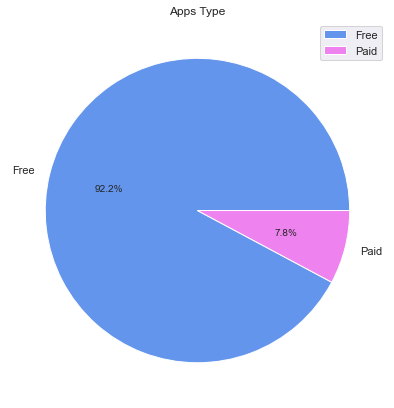

In [523]:
plt.figure(figsize=(7,7))
plt.pie(apps['Type'].value_counts(),labels=apps['Type'].unique(),colors=['cornflowerblue','violet'],autopct='%.1f%%') 
#autopct to show distribution percents
plt.title('Apps Type')
plt.legend()
plt.show()

Paid and Free apps on pie chart

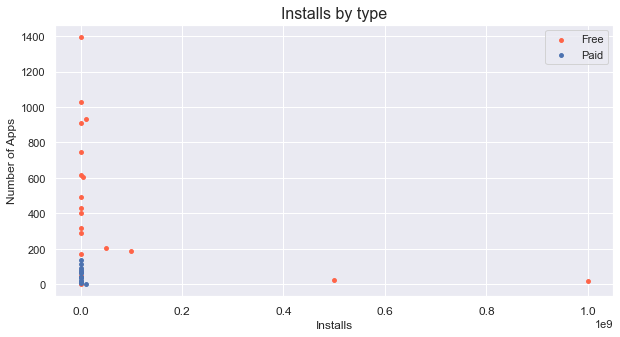

In [524]:
fig, ax = plt.subplots(figsize=(10,5)) #scatter plot

ax.scatter(sep['Free'].index, sep['Free'].values,color = 'tomato',s = 15) #s is size of circles
ax.scatter(sep['Paid'].index, sep['Paid'].values, c = 'b',s = 15) 
ax.set_title('Installs by type',size=16)
plt.xticks(size = 12)
plt.ylabel("Number of Apps",size=12)
plt.xlabel("Installs",size=12)
plt.legend(apps['Type'].unique())


plt.show()

People install free apps more often.7.8% of apps are Paid. It is clear that the most number of installs have free apps. By scatter plot we confirm that.

### 5.4 Q4:  Are there any dependence of app size on Android version of mobile? Describe the relationship between them. 

In [525]:
av=apps['Android Ver'].value_counts() 

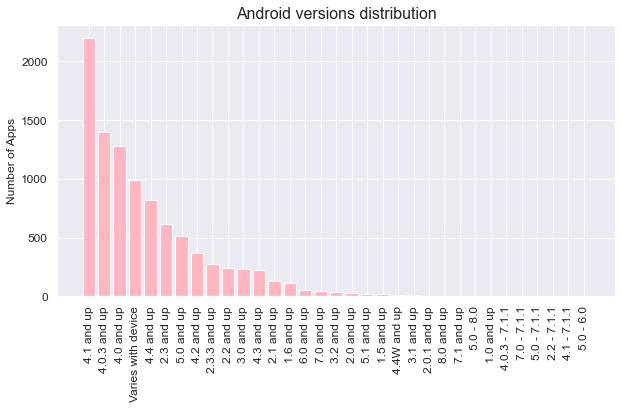

In [526]:
plt.subplots(figsize=(10,5))

plt.bar(av.index,av,color='lightpink') #bar chart for visualization
plt.title('Android versions distribution',size=16)
plt.ylabel("Number of Apps",size=12)
plt.xticks(size = 12,rotation=90) #rotation to make xticks vertical
plt.yticks(size = 12)
plt.show()

We see that the most number of apps can be download on 4.1 and up Android versions. By this plot we can clearly see distribution android versions. But we can not do such distribution for Size column, because every app has different size. So how can we connect size of apps and versions of Android? I think we can find maximum size of app that can be downloaded on mobile of certain Android version, after that create plot. It can be done by groupby function:

In [527]:
version = apps.groupby('Android Ver',as_index=False).Size.max()
version.head()

,Android Ver,Size
0,1.0 and up,6900000.0
1,1.5 and up,48000000.0
2,1.6 and up,50000000.0
3,2.0 and up,44000000.0
4,2.0.1 and up,45000000.0


Now we can use plot. But Android versions have too long values. To shorten them we replace 'and up', 'Varies with device'.

In [528]:
version['Android Ver']=version['Android Ver'].str.replace('and up','').str.replace('Varies with device','Varies')
version.head()

,Android Ver,Size
0,1.0,6900000.0
1,1.5,48000000.0
2,1.6,50000000.0
3,2.0,44000000.0
4,2.0.1,45000000.0


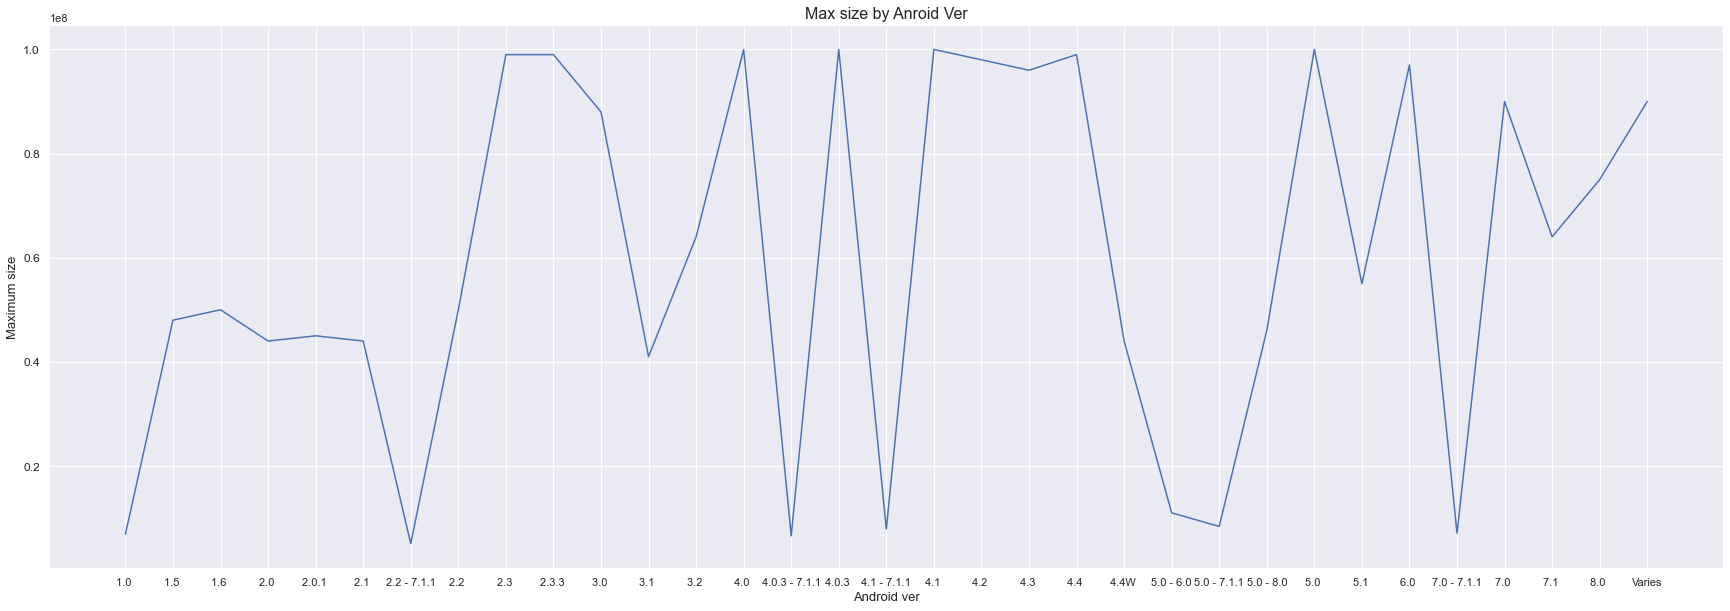

In [529]:
plt.subplots(figsize=(30,10))

plt.plot(version['Android Ver'], version['Size']) #line plot; for x axis - Android Ver, foy y - Max Size
plt.title('Max size by Anroid Ver',size=16)
plt.ylabel("Maximum size",size=13)
plt.xlabel("Android ver",size=13)
plt.yticks(size = 12) 
plt.show()

We notice that devices that have an older versions can not download big apps. But There are some outliers in graph that occur at random on different Android versions.By graphic we see that there is weak relationship between max size of app and Android Version.

### 5.5 Q5: Compare by rating the most popular and the least popular apps in 'Everyone', 'Teen', 'Adults only 18+' content ratings

In [530]:
ev=apps[apps['Content Rating']=='Everyone'].sort_values(by=['Installs','Rating','Reviews'],ascending=False) #sort by descending 
teen=apps[apps['Content Rating']=='Teen'].sort_values(by=['Installs','Rating','Reviews'],ascending=False)
adult=apps[apps['Content Rating']=='Adults only 18+'].sort_values(by=['Installs','Rating','Reviews'],ascending=False)

Popularity defines first by number of Installs, then Rating and number of Reviews 

In [531]:
ev.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
2808,Google Photos,PHOTOGRAPHY,4.5,10858556,0.0,1000000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,0
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,0
3234,Google,TOOLS,4.4,8033493,0.0,1000000000,Free,0.0,Everyone,Tools,2018-08-03,Varies with device,Varies with device,0
3454,Google Drive,PRODUCTIVITY,4.4,2731171,0.0,1000000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device,0
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,0.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,0


In [532]:
ev=ev.iloc[[0, -1]]
teen=teen.iloc[[0, -1]]
adult=adult.iloc[[0, -1]]

We leave only the most popular and most unpopular application in each dataframe 

In [533]:
df = pd.DataFrame(ev).append(teen).append(adult)

Make new dataframe

In [534]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
2808,Google Photos,PHOTOGRAPHY,4.5,10858556,0.0,1000000000,Free,0.00,Everyone,Photography,2018-08-06,Varies with device,Varies with device,0
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.3,0,40000000.0,0,Paid,399.99,Everyone,Lifestyle,2017-12-01,MONEY,4.1 and up,1


In [535]:
df['App']=df['App'].str.replace('/Eu sou Rico/أنا غني/我很有錢','')

We leave only english title of app with index 9934, otherwise will occur warnings as 'Glyph missing from current font. font.set_text(s, 0, flags=flags)', cause plt cannot find the font

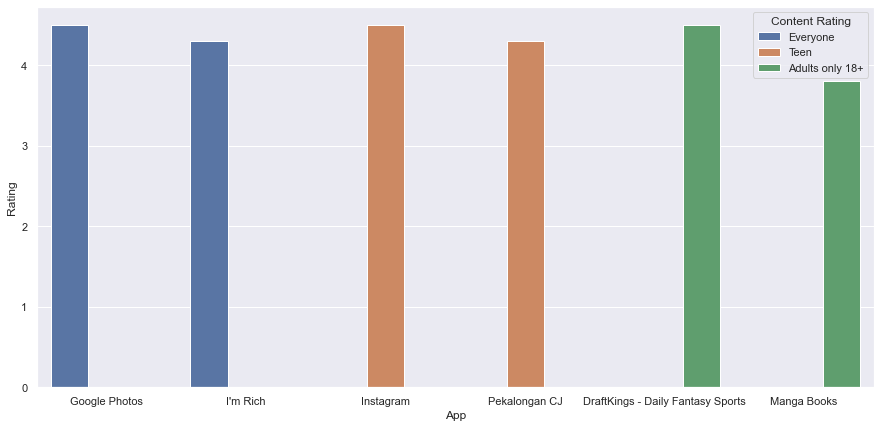

In [536]:
# visualisation code for Q3

plt.figure(figsize = (15, 7))
sns.set_style("whitegrid")   
sns.set(font_scale = 1)  #size of words
sns.barplot(data = df, x = 'App', y = 'Rating', hue = 'Content Rating') #apply seaborn

plt.show()

By barcharts we can see that ratings of most and least popular apps in 'Everyone', 'Teen', 'Adults only 18+' content ratings are almost the same, which means that popularity can not be consider first by rating of app. The most important is number of installs.Because app that was installed by 100k users can have rating 4.2, when app with 2 installs have rating 4.4 

# Conclusion

Google App Store dataset can be used for many purposes. We can make a lot of different plots that is used for visualisation and better understanding. 
<br>
People more prefer Free apps.By answering to the questions we understood that popularity of app firstly depends on number of Installs.Then by Rating, Type and number of reviews.
<br>
By making such kind of analysis we specify trend apps and can make predictions of relevance of application.

---

## Evaluation form (Keep it!)

| Project part | Mark     | Comment   
|:-------:|:--------:|:----------------------
| Introduction       |   5/5    |     To get full pint, you need to give brief background of your project and why it is interesting for you. 
| Data description       |   5/5    | To get full point, you provide description of your dataset, namely columns.
| Research questions       |   5/5    | To get full point, you need to create at least 5 good, different, interseting questions. 
| Data prepartion       |   20/20    | To get full point, you need to show proficient skill in using pandas in the purpose of data preparation. 
| Data analysis and visualisation       |   30/30    | To get full point, you need to show proficient skill in using matplotlib or seaborn (or other libraries along with some pandas in the purpose of data visualisation and analysis. Also, you should commment all your graphs.
| Conclusion       |   5/5    | To get full point, you need to write summary of your finding in general.
| Structure and code       |   10/10    | To get full point, you need to write efficient code, and all the libraries should be properly used. Also, the whole project should be well structured. 
| Defense      |   20/20    | To get full point, students should properly present their projects during the defense and be able to answer questions from instructor.
| Data modelling       |   5/5 (bonus)    | 
|**Total**|**100/100**  | 
